1. Importing Necessary Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

2. Loading the Dataset

In [49]:
#Loading the dataset into pandas dataframe
df = pd.read_csv('data.csv')

In [50]:
#Display top 5 rows from dataset
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [51]:
#Display last 5 rows from dataset
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


3. Check Datatypes

In [52]:
#Display the Datatype of each column of the dataset
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

4. Drop Irrelevant Columns

In [53]:
#Dropping selected columns from the dataset and then displaying top 5 columns 
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


5. Rename Columns

In [54]:
#Renaming specific Columns and then printing top 5 rows
df.rename(columns={'Engine HP':'HP', 'Engine Cylinders':'Cylinders', 'Transmission Type':'Transmission', 'Driven_Wheels':'Drive mode', 'highway MPG':'MPG-H', 'city mpg':'MPG-C', 'MSRP':'Price'}, inplace=True)
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


6. Drop Duplicate Rows

In [55]:
#Display original shape of dataset
df.shape

(11914, 10)

In [56]:
#Display Number of Duplicated Rows
dups = df.duplicated()
print(dups.sum())

989


In [57]:
#Drop duplicate Rows
df.drop_duplicates(inplace=True)

In [58]:
#Display shape of new dataset
df.shape

(10925, 10)

7. Statistical Summary

In [59]:
#To describe statistics of all numerical columns in the given dataset
df.describe()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
count,10925.000000,10856.000000,10895.000000,10925.000000,10925.000000,1.092500e+04
mean,2010.917895,254.399503,5.668196,26.654737,19.770801,4.249660e+04
std,7.016102,109.771351,1.799464,9.031109,9.259532,6.205353e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.199500e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.092000e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


8. Handle Missing Values

In [60]:
#Sum of Missing or Null Values for each Column
df.isna().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64

In [61]:
#Dropping all rows with missing or null values
df.dropna(subset=['Cylinders', 'HP'], inplace = True)
df.isna().sum()
#this shows that cleaning process is done successfully

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

9. Data Visualization

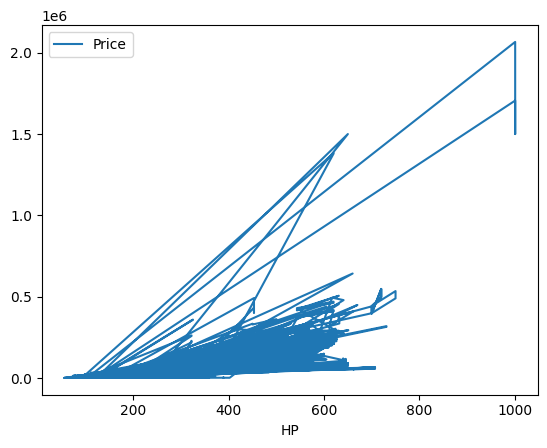

In [62]:
#HP Vs Price
df.plot(x='HP', y='Price', kind='line')
plt.show()

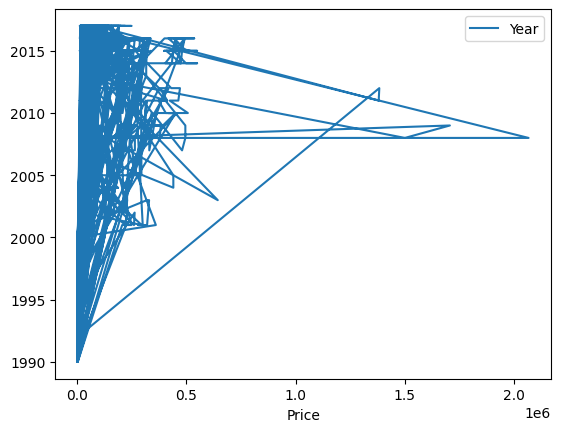

In [63]:
#Sales by Year
df.plot(x='Price', y='Year', kind='line')
plt.show()

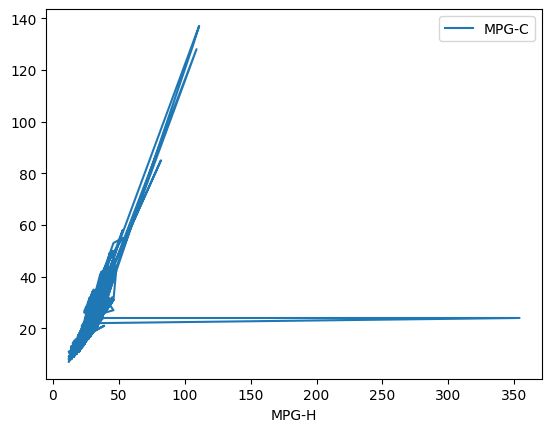

In [64]:
#Highway MPG vs City MPG
df.plot(x='MPG-H', y='MPG-C', kind='line')
plt.show()

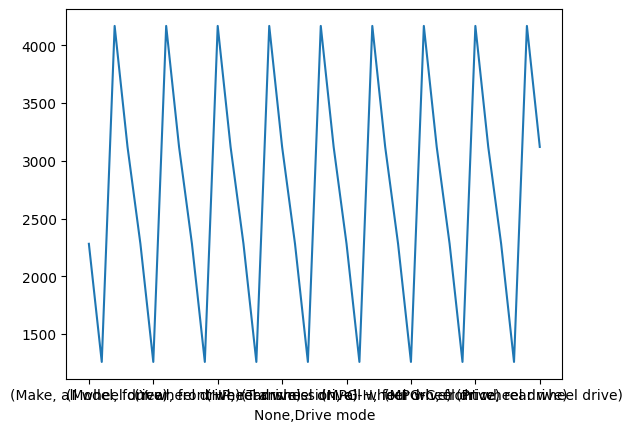

In [65]:
#Graph by Drive mode
kl = df.groupby(['Drive mode']).count()
kl.unstack().plot()
plt.show()

<Axes: title={'center': 'Transmission vs MPG-H and MPG-C'}, xlabel='Transmission'>

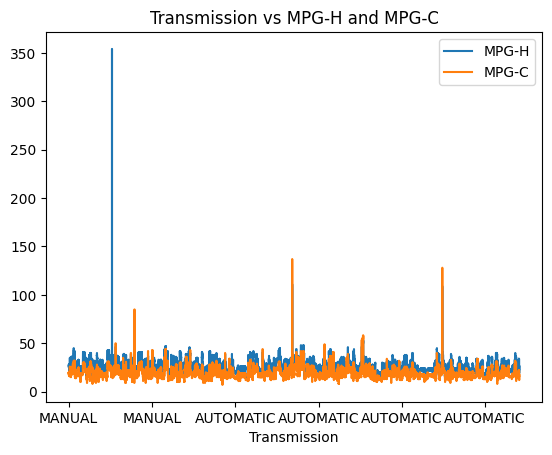

In [66]:
#Transmission vs MPG-H and MPG-C
df.plot(x='Transmission', y=['MPG-H', 'MPG-C'], kind='line', title='Transmission vs MPG-H and MPG-C')

10. Correlation Matrix and Heatmap

In [67]:
#To find only numeric columns from a dataset
new = df.select_dtypes(include=np.number)
print(new)

       Year     HP  Cylinders  MPG-H  MPG-C  Price
0      2011  335.0        6.0     26     19  46135
1      2011  300.0        6.0     28     19  40650
2      2011  300.0        6.0     28     20  36350
3      2011  230.0        6.0     28     18  29450
4      2011  230.0        6.0     28     18  34500
...     ...    ...        ...    ...    ...    ...
11909  2012  300.0        6.0     23     16  46120
11910  2012  300.0        6.0     23     16  56670
11911  2012  300.0        6.0     23     16  50620
11912  2013  300.0        6.0     23     16  50920
11913  2006  221.0        6.0     26     17  28995

[10827 rows x 6 columns]


In [68]:
#Correlation Matrix for the above numeric columns
ht = new.corr()
print(ht)

               Year        HP  Cylinders     MPG-H     MPG-C     Price
Year       1.000000  0.314971  -0.050598  0.284237  0.234135  0.196789
HP         0.314971  1.000000   0.788007 -0.420281 -0.473551  0.659835
Cylinders -0.050598  0.788007   1.000000 -0.611576 -0.632407  0.554740
MPG-H      0.284237 -0.420281  -0.611576  1.000000  0.841229 -0.209150
MPG-C      0.234135 -0.473551  -0.632407  0.841229  1.000000 -0.234050
Price      0.196789  0.659835   0.554740 -0.209150 -0.234050  1.000000


<Axes: >

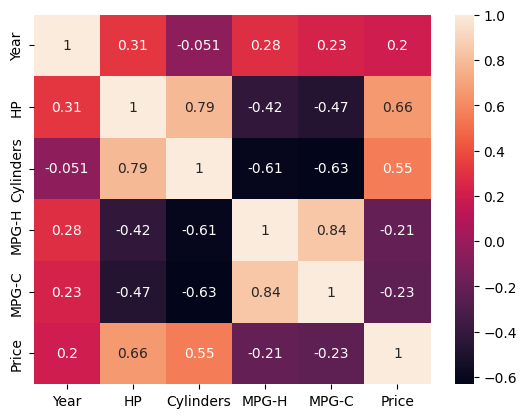

In [69]:
#Heatmap of above correlations
sns.heatmap(ht, annot=True)